# Iris Flowers Classification

The Iris data set is a multivariate data set used by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis.

The data consists of 50 samples from each of three species of Iris:
- Iris setosa
- Iris virginica
- Iris versicolor

Four features were measured in centimeters from each sample:
- length of the sepals
- length of the petals
- width of the sepals
- width of the petals

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species frrom each other.

## Load the Data 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Scatter Plot of the Iris dataset 

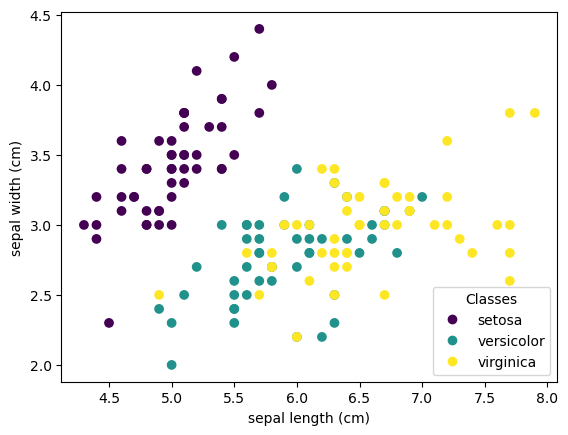

In [10]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [11]:
# Store the feature matrix (X): input, and response vector (y): output (pre labeled answers)
X = iris.data #input x
y = iris.target #output y

feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


## Split the Data

In [12]:
# Split sata into training and test sets
from sklearn.model_selection import train_test_split
'''
0.2 gives 96.7% accuracy
0.1 gives 100% accuracy
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## Create the Model 

In [13]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # 3 Iris flower types
knn.fit(X_train, y_train)

# Decision Tree. Note: not very good at prediction for this set
# from sklearn.tree import DecisionTreeClassifier 
# knn = DecisionTreeClassifier() 
# knn.fit(X_train, y_train) 

# Make prediction
y_pred = knn.predict(X_test)

## Check the Output

In [14]:
# Accuracy of out model based on our test output and prediction output
from sklearn import metrics
print("{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

93.33%


## Improve 

In [15]:
sample = [[3,5,4,2], [2,3,5,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']


## Model Persistance

In [16]:
# Model persistence is important. Next time we want to make a prediction we save a model 
# to a file and use that file for predictions.

import joblib
model = joblib.dump(knn, 'mlbrain.joblib')

In [17]:
#Load our model
model = joblib.load('mlbrain.joblib')

model.predict(X_test)

sample = [[3,5,4,2], [2,3,5,4]]
predictions = model.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("Predictions: ", pred_species)

Predictions:  ['versicolor', 'virginica']


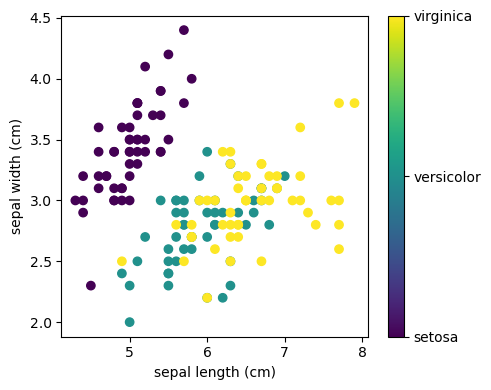

In [18]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

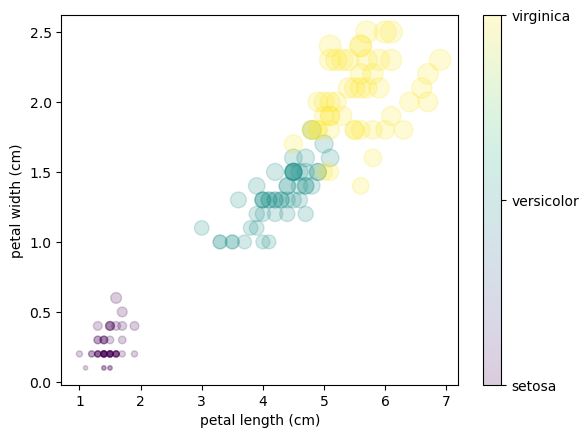

In [19]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)